In [1]:
import torch
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor
from misc import *
from pose import *

import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

In [6]:
class SCSam2:
    def __init__(self, device):
        sam_checkpoint = "../../models/sam2.1_hiera_large.pt"
        model_cfg = "./configs/sam2.1/sam2.1_hiera_l.yaml"
        self.predictor = SAM2ImagePredictor(build_sam2(model_cfg, sam_checkpoint, device=device))
        
        
        self.input_points = []
        self.input_labels = []
        self.images = []
    
    def LoadImage(self, folder, numImage):
        self.folder = folder
        self.numImage = numImage
        
        poses, pts3d, self.perms, self.w2c, self.c2w = load_colmap_data(self.folder)
        cdepth, idepth = computecloseInfinity(poses, pts3d, self.perms)
        self.close_depth = np.min(cdepth) * 0.9
        self.inf_depth = np.max(idepth) * 2.0
        self.focals = poses[2, 4, :]


        for i in range(numImage):
            filename = self.folder + "/images/{:03d}.png".format(i)
            image = cv2.imread(filename)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            self.images.append(image)
            self.input_points.append([])
            self.input_labels.append([])

    def AddPoint(self, refCamID, point, label):
        print(point.shape)
        print(label.shape)
        self.predictor.set_image(self.images[refCamID])
        masks, scores, logits = self.predictor.predict(point_coords=point, point_labels=label, multimask_output=False,)
        
        plt.imshow(self.images[refCamID])
        show_points(point, label, plt.gca())
        plt.axis('on')
        plt.show()

        plt.imshow(self.images[refCamID])
        show_mask(masks, plt.gca())
        show_points(point, label, plt.gca())
        #plt.title(f"Score: {scores:.3f}", fontsize=18)
        plt.axis('off')
        plt.show()

        print(masks.shape)
        h, w = masks.shape[-2:]
        self.mask_image = masks.reshape(h, w, 1)

In [7]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [8]:
print(device)

sam = SCSam2(device)
sam.LoadImage("../../Data/Sample1", 16)

cpu
Cameras 5
['000.png', '001.png', '002.png', '004.png', '003.png', '006.png', '005.png', '012.png', '007.png', '014.png', '008.png', '009.png', '011.png', '010.png', '013.png', '015.png']
Images # 16


(1, 2)
(1,)


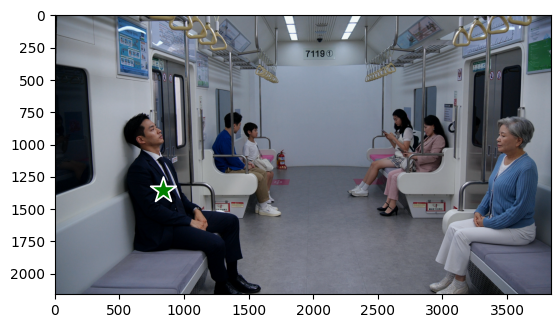

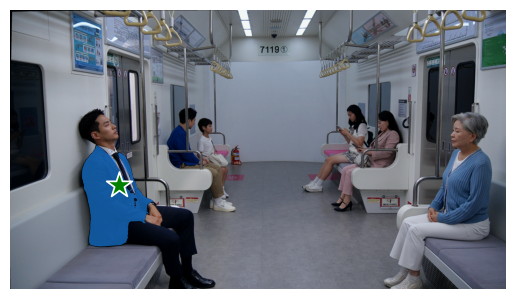

(1, 2160, 3840)


In [9]:
sam.AddPoint(0, np.array([[840, 1356]]), np.array([1]))

In [10]:
print(sam.mask_image.shape)

(2160, 3840, 1)


In [11]:
cv2.imwrite("temp.png", sam.mask_image * 255)

True

In [12]:
coords = np.where(sam.mask_image > 0.0)
boundingBox = int(np.min(coords[1])), int(np.max(coords[1])), int(np.min(coords[0])), int(np.max(coords[0]))
        

In [13]:
print(boundingBox)

(555, 1434, 820, 2037)


In [14]:
optZ, offsetX, offsetY = computeOffset(sam.images, boundingBox, sam.c2w, sam.w2c, sam.focals, 0, sam.close_depth, sam.inf_depth, sam.perms)
        

311.64255923806047 175.8267279952439
311.64255923806047 209.93558621984417
311.64255923806047 267.40409900184613
311.64255923806047 232.53777652617416
311.64255923806047 227.99240902406208
311.64255923806047 253.6477924841203
311.64255923806047 296.4735504865609
311.64255923806047 228.98852905284897
311.64255923806047 269.07164804906284
311.64255923806047 293.482981319816
311.64255923806047 315.9603804874996
311.64255923806047 209.85886917613192
311.64255923806047 221.11988485246724
311.64255923806047 256.39364185362496
311.64255923806047 293.0489251853938
163.8427584752011 161.30157389154854
163.8427584752011 183.20595137519948
163.8427584752011 231.4147188585375
163.8427584752011 226.9178384805532
163.8427584752011 216.3589035952314
163.8427584752011 238.1730967802497
163.8427584752011 272.04802403078946
163.8427584752011 211.77905469792262
163.8427584752011 245.9015488594762
163.8427584752011 262.1126505835602
163.8427584752011 296.4842579555055
163.8427584752011 197.84410025344974


In [15]:
print(offsetX)

[np.float64(-2.2737367544323206e-13), np.float64(-114.71324849993539), np.float64(-290.45267028631133), np.float64(-500.2998186023781), np.float64(43.98297701197703), np.float64(-118.69873371423364), np.float64(-367.8993692515962), np.float64(-473.09025689689247), np.float64(-46.19873511357923), np.float64(-81.26818490615983), np.float64(-308.1323908812783), np.float64(-427.5031082882506), np.float64(14.502056813485751), np.float64(-162.60987569130498), np.float64(-271.8438108430221), np.float64(-449.9663234711227)]


In [23]:
point = np.array([[840, 1356]])
label = np.array([1])
print(point.shape)
print(label.shape)

(1, 2)
(1,)


(1, 2) (1,)


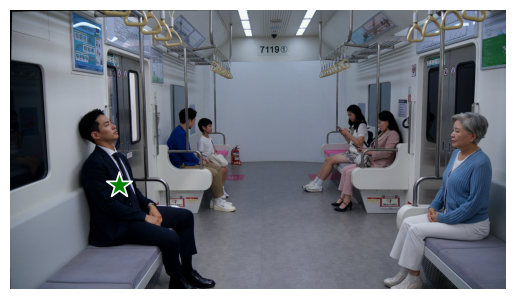

(1, 2) (1,)


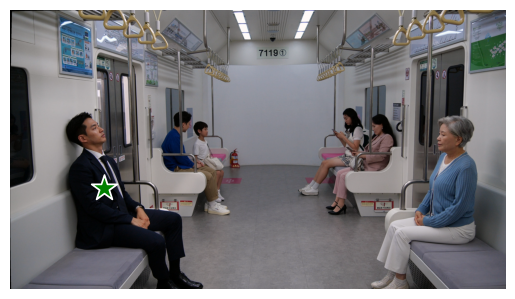

(1, 2) (1,)


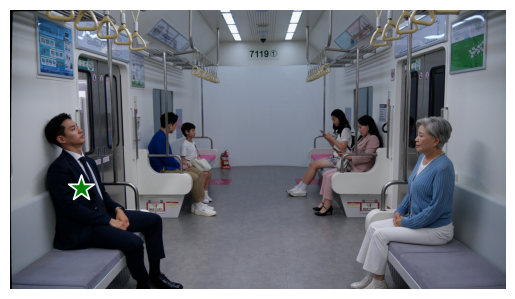

(1, 2) (1,)


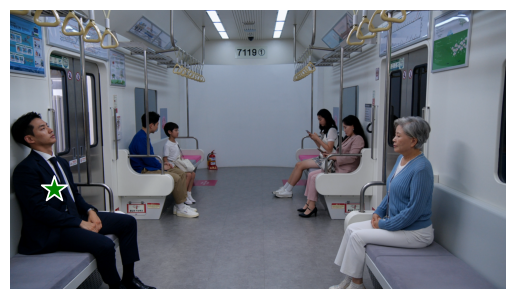

(1, 2) (1,)


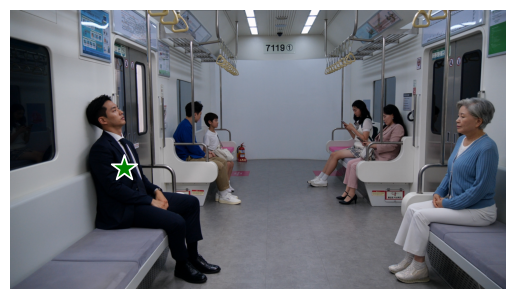

(1, 2) (1,)


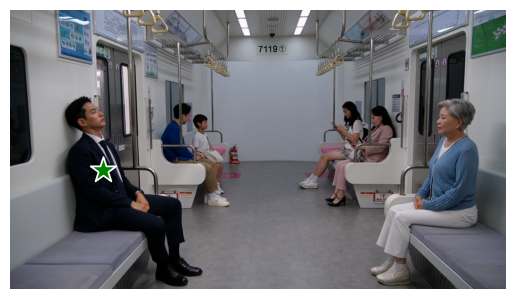

(1, 2) (1,)


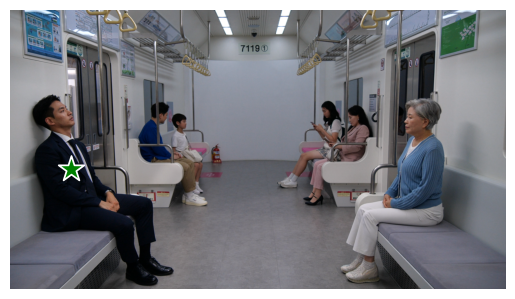

(1, 2) (1,)


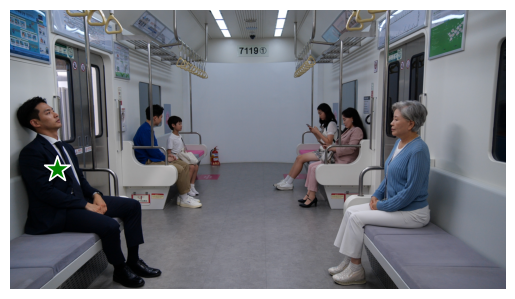

(1, 2) (1,)


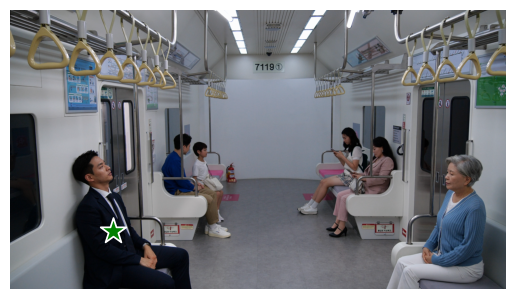

(1, 2) (1,)


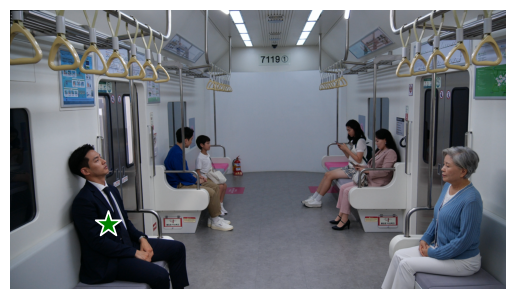

(1, 2) (1,)


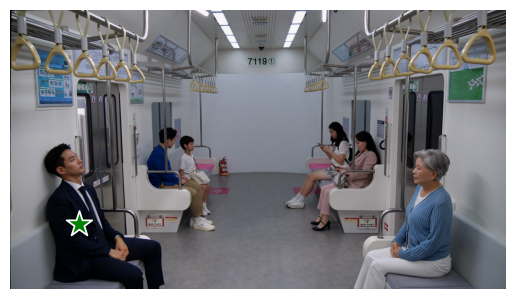

(1, 2) (1,)


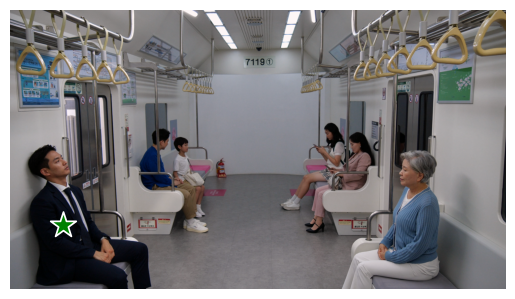

(1, 2) (1,)


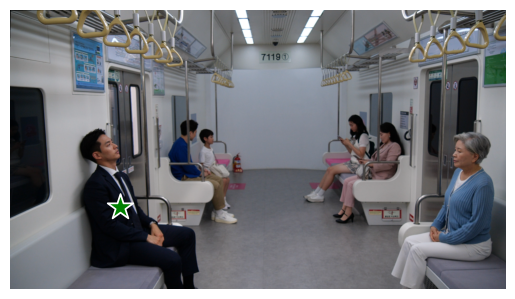

(1, 2) (1,)


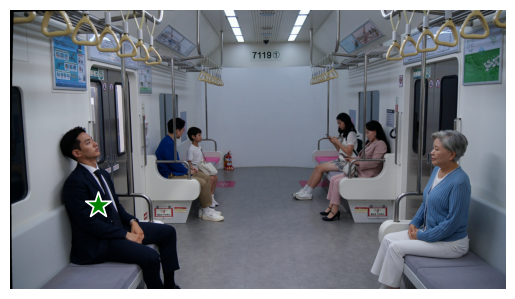

(1, 2) (1,)


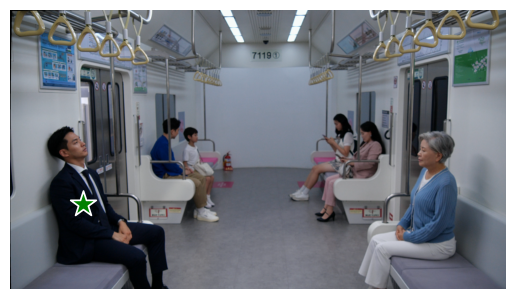

(1, 2) (1,)


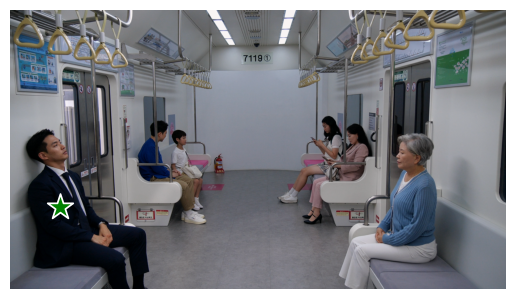

In [27]:
for i in range(sam.numImage):
            sam.input_points[i].append([[point[0][0] + offsetX[i], point[0][1] +  = np.array([[point[0][0] + offsetX[i], point[0][1] + offsetY[i]]])
            sam.input_labels[i] = label
            plt.imshow(sam.images[i])
            print(sam.input_points[i].shape, sam.input_labels[i].shape)
            show_points(sam.input_points[i], sam.input_labels[i], plt.gca())
            plt.axis('off')
            plt.show()